  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 no

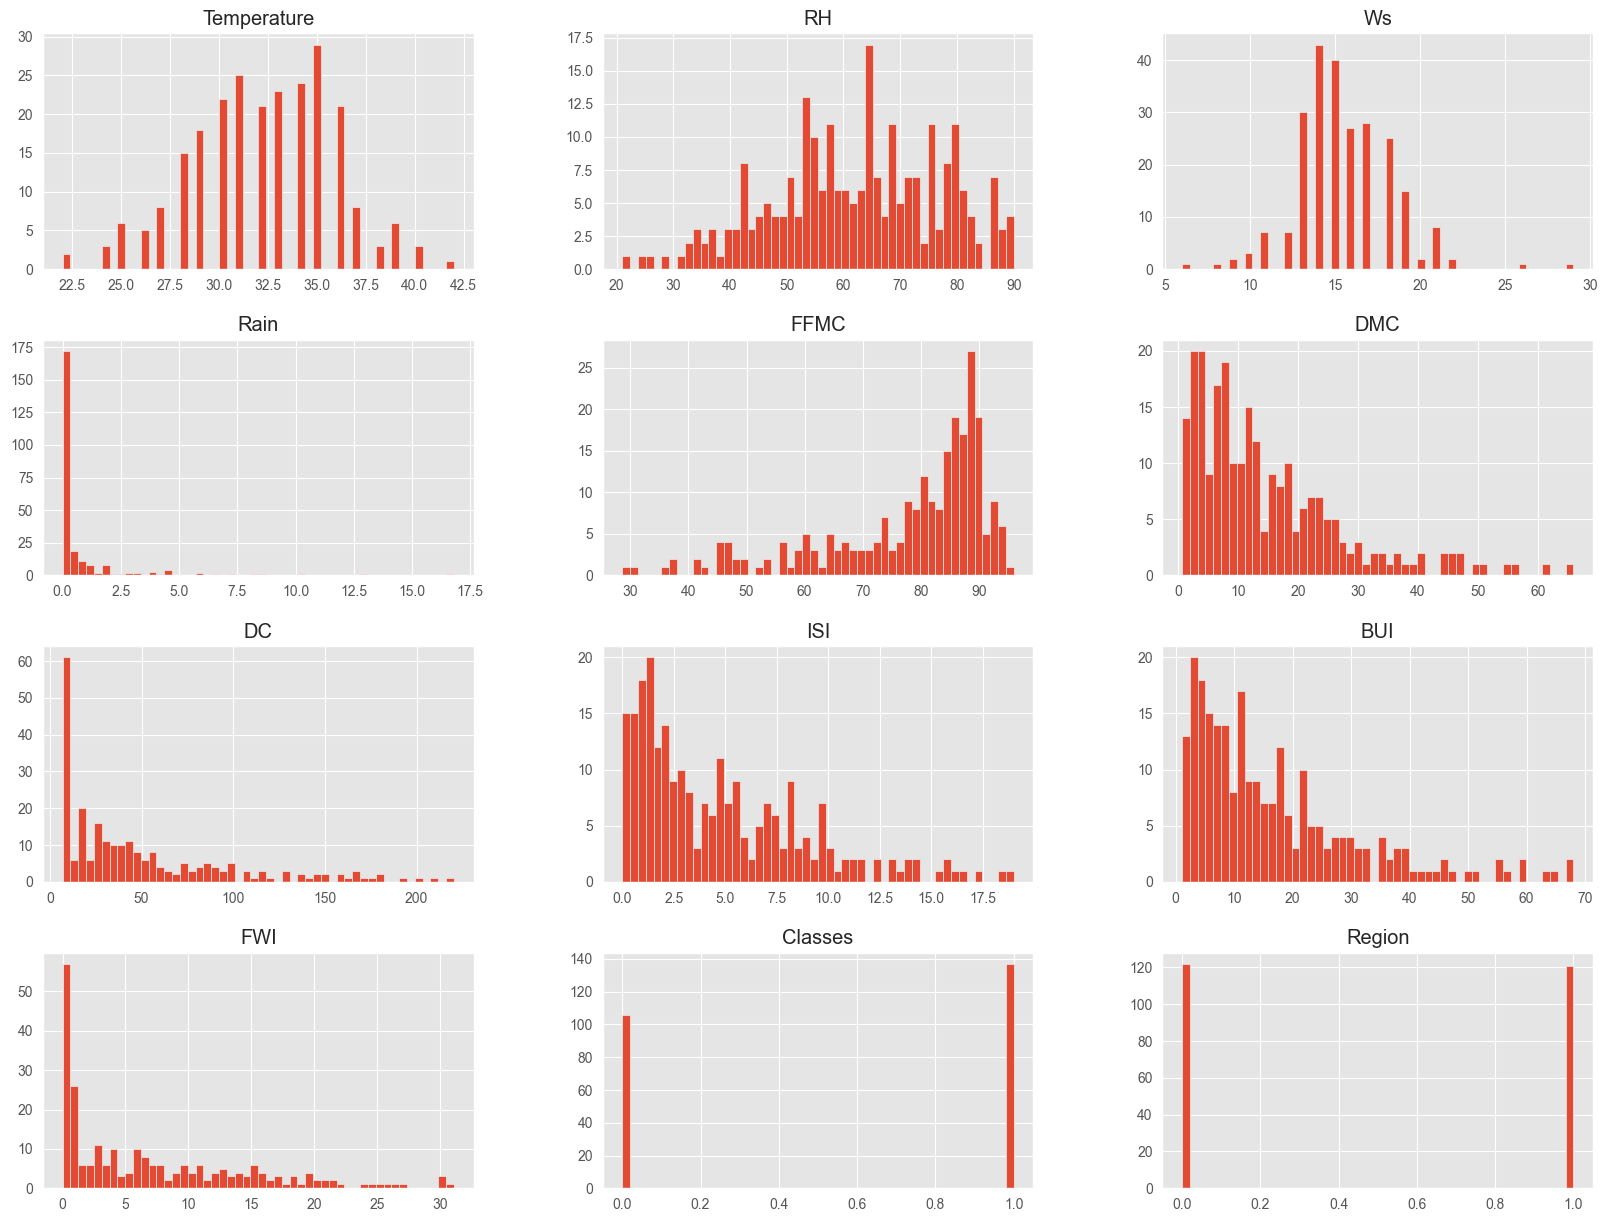

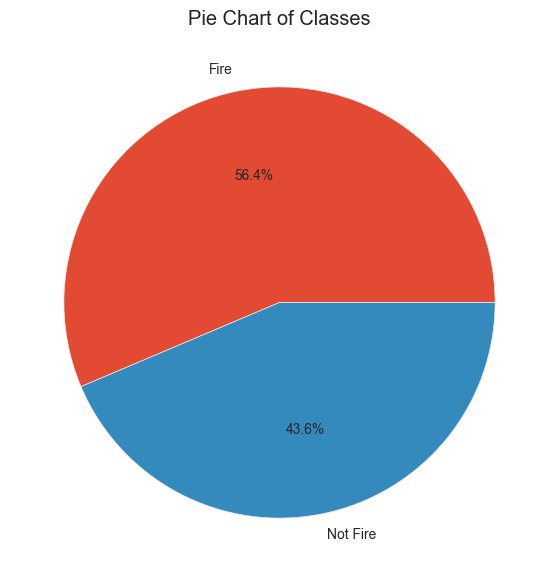

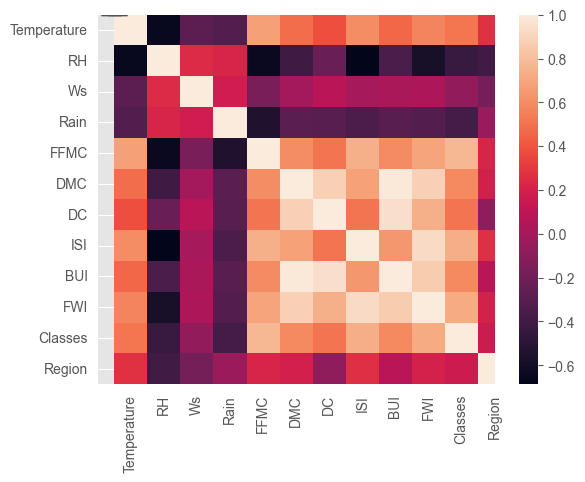

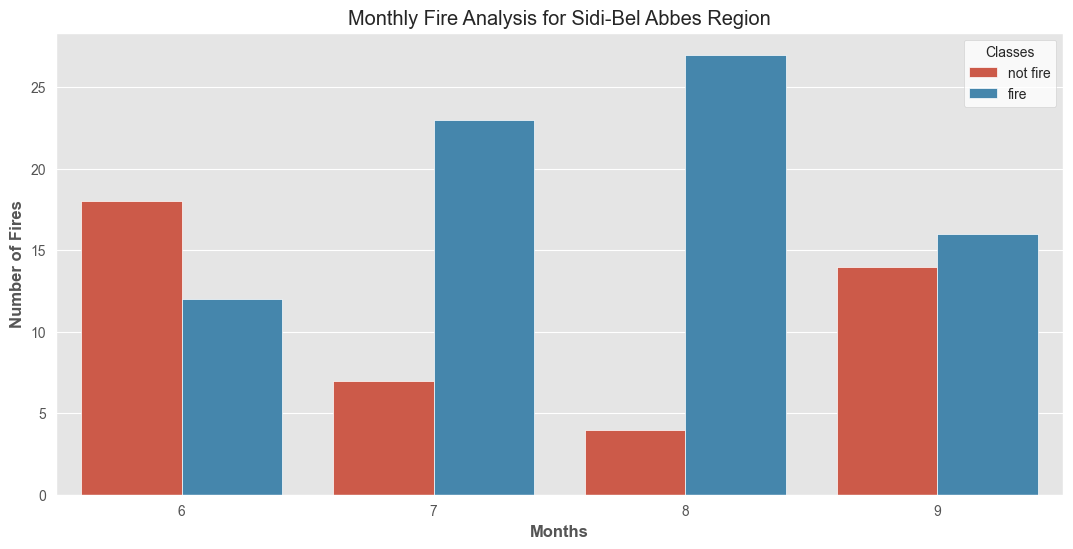

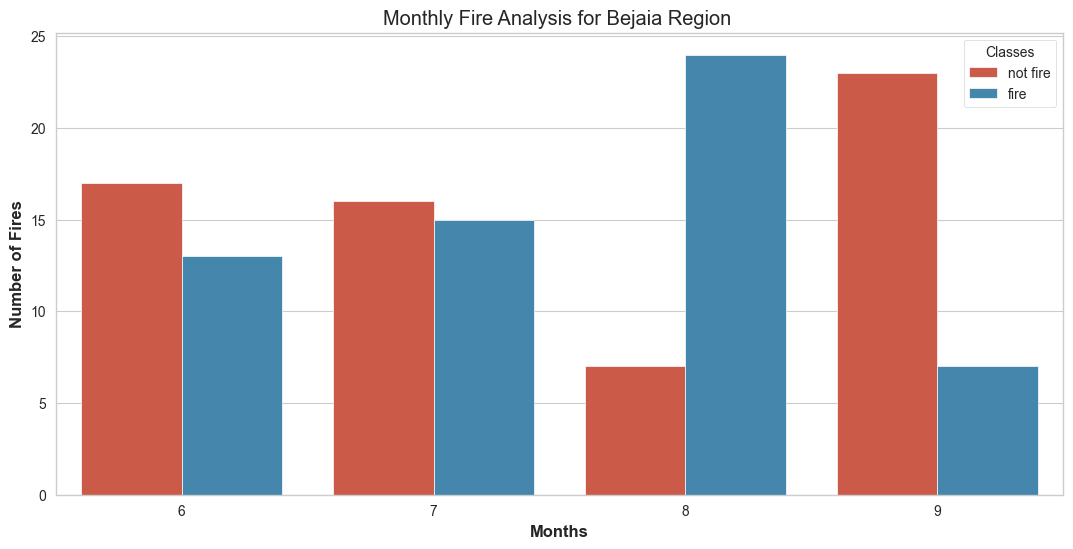

In [28]:
# # 🧪 Step 1: Import Libraries
# import pandas as pd # Data manipulation
# import numpy as np # Numerical operations
# import matplotlib.pyplot as plt # Plotting
# import seaborn as sns # Statistical data visualization
# # Inline plotting for Jupyter notebooks
# %matplotlib inline

# # 📥 Step 2: Load & Inspect Dataset
# # header=1 is used to skip the first row of the CSV file
# #Skip metadata row using header=1.
# dataset = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
# print(dataset.head())

# # 🧮 Step 3: Data Preprocessing
# print("Information of dataset", dataset.info())

# # Data Cleaning: Remove rows with missing values
# #missing_values
# dataset[dataset.isnull().any(axis=1)]

# # The dataset is converted into two sets based on Region from 122th index , 
# # we can make a new column based on the Region
# # dataset.loc[:122,"Region"] = 0 means the first 123 rows (0 to 122) will be assigned Region 0
# # dataset.loc[122:,"Region"] = 1 means the rows from 123 to the end will be assigned Region 1
# dataset.loc[:122, "Region"] = 0
# dataset.loc[123:, "Region"] = 1
# df = dataset
# df.info()

# #df[["Region"]]  = df[["Region"]].astype(int) means converting the Region column to integer type
# df[["Region"]] = df[["Region"]].astype(int) # Convert Region to integer type
# df.head()

# # Check for any remaining missing values
# #as there are 2 null values
# df.isnull().sum()

# # day            0
# # month          1
# # year           1
# # Temperature    1
# #  RH            1
# #  Ws            1
# # Rain           1
# # FFMC           1
# # DMC            1
# # DC             1
# # ISI            1
# # BUI            1
# # FWI            1
# # Classes        2
# # Region         0
# # dtype: int64

# # Removing the null values
# df = df.dropna().reset_index(drop=True)
# df.head()

# # Check for any remaining missing values after dropping nulls
# df.isnull().sum()  # no null values 

# # day            0
# # month          0
# # year           0
# # Temperature    0
# #  RH            0
# #  Ws            0
# # Rain           0
# # FFMC           0
# # DMC            0
# # DC             0
# # ISI            0
# # BUI            0
# # FWI            0
# # Classes        0
# # Region         0

# df.iloc[[122]]
# # 	day	month	year	Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI	FWI	Classes	Region
# # 122	day	month	year	Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI	FWI	Classes	1

# # removing 122 row
# df = df.drop(122).reset_index(drop=True)
# df.iloc[[122]]
# # 	day	month	year	Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI	FWI	Classes	Region
# #122 01	06	   2012	     32	        71	12	0.7	    57.1	2.5	8.2	0.6	2.8	0.2	not fire	1

# # 
# df.columns 
# # Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
# #        'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
# #       dtype='object')

# # fixes spaces in column name
# df.columns = df.columns.str.strip()
# df.columns
# # Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
# #        'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
# #       dtype='object')

# # Change the required columns as integer data type
# # day month  year Temperature  RH  Ws-> change int data-type
# df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

# # If any float conversion is needed for Rain, FFMC, etc., you can add:
# df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

# df.info()


# 🧪 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 📥 Step 2: Load & Inspect Dataset
dataset = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
print(dataset.head())

# 🧮 Step 3: Data Preprocessing

# Step 3.1: Remove whitespace from column names
dataset.columns = dataset.columns.str.strip()

# Step 3.2: Assign Region column based on row index
dataset.loc[:122, "Region"] = 0
dataset.loc[123:, "Region"] = 1

# Step 3.3: Drop rows with missing values
dataset = dataset.dropna().reset_index(drop=True)

# Step 3.4: Remove possible duplicate header row (if 'day' appears as a value)
dataset = dataset[dataset['day'] != 'day'].reset_index(drop=True)

# Step 3.5: Strip whitespace inside categorical columns (especially 'Classes')
dataset['Classes'] = dataset['Classes'].str.strip()

# Step 3.6: Convert relevant columns to numeric types
int_cols = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']
for col in int_cols:
    dataset[col] = dataset[col].astype(int)

float_cols = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in float_cols:
    dataset[col] = dataset[col].astype(float)

# 🧾 Step 4: Final Info Check
print(dataset.info())
# #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   day          243 non-null    int64  
#  1   month        243 non-null    int64  
#  2   year         243 non-null    int64  
#  3   Temperature  243 non-null    int64  
#  4   RH           243 non-null    int64  
#  5   Ws           243 non-null    int64  
#  6   Rain         243 non-null    float64

# 👀 Preview cleaned data
print(dataset.head())

# changing the other column as float datatype
objects = [features for features in dataset.columns if dataset[features].dtype == 'O']

for i in objects:
    if i != 'Classes':
        dataset[i] = dataset[i].astype(float)


dataset.info()
# #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   day          243 non-null    int64  
#  1   month        243 non-null    int64  
#  2   year         243 non-null    int64  
#  3   Temperature  243 non-null    int64  
#  4   RH           243 non-null    int64  
#  5   Ws           243 non-null    int64  
#  6   Rain         243 non-null    float64
# ...
#  13  Classes      243 non-null    object 
#  14  Region       243 non-null    int64  

dataset.describe()

# day	month	year	Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI	FWI	Region
# count	243.000000	243.000000	243.0	243.000000	243.000000	243.000000	243.000000	243.000000	243.000000	243.000000	243.000000	243.000000	243.000000	243.000000
# mean	15.761317	7.502058	2012.0	32.152263	62.041152	15.493827	0.762963	77.842387	14.680658	49.430864	4.742387	16.690535	7.035391	0.497942
# std	8.842552	1.114793	0.0	3.628039	14.828160	2.811385	2.003207	14.349641	12.393040	47.665606	4.154234	14.228421	7.440568	0.501028
# min	1.000000	6.000000	2012.0	22.000000	21.000000	6.000000	0.000000	28.600000	0.700000	6.900000	0.000000	1.100000	0.000000	0.000000
# 25%	8.000000	7.000000	2012.0	30.000000	52.500000	14.000000	0.000000	71.850000	5.800000	12.350000	1.400000	6.000000	0.700000	0.000000
# 50%	16.000000	8.000000	2012.0	32.000000	63.000000	15.000000	0.000000	83.300000	11.300000	33.100000	3.500000	12.400000	4.200000	0.000000
# 75%	23.000000	8.000000	2012.0	35.000000	73.500000	17.000000	0.500000	88.300000	20.800000	69.100000	7.250000	22.650000	11.450000	1.000000
# max	31.000000	9.000000	2012.0	42.000000	90.000000	29.000000	16.800000	96.000000	65.900000	220.400000	19.000000	68.000000	31.100000	1.000000

# Let save clean data set
# index=False ->it will not save index
dataset.to_csv("Algerian_forest_fires_clean_dataset_.csv",index=False) 
#Exploratory Data Analysis 
## Drop irrelevant date columns for EDA
df_copy = dataset.drop(['day','month','year'],axis=1)
## Preview updated DataFrame
df_copy.head()

# | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Classes  | Region |
# | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

# Providing 0 and 1's to not fire and fire
#Encoding the category in classes  
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()
# | Temperature |  RH  | Ws | Rain | FFMC | DMC |  DC  | ISI | BUI | FWI | Classes | Region |
# |-------------|------|----|------|------|-----|------|-----|-----|-----|---------|--------|
# |     29      |  57  | 18 | 0.0  | 65.7 | 3.4 |  7.6 | 1.3 | 3.4 | 0.5 |    0    |    0   |
# |     29      |  61  | 13 | 1.3  | 64.4 | 4.1 |  7.6 | 1.0 | 3.9 | 0.4 |    0    |    0   |
# |     26      |  82  | 22 |13.1  | 47.1 | 2.5 |  7.1 | 0.3 | 2.7 | 0.1 |    0    |    0   |
# |     25      |  89  | 13 | 2.5  | 28.6 | 1.3 |  6.9 | 0.0 | 1.7 | 0.0 |    0    |    0   |
# |     27      |  77  | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 |    0    |    0   |

df_copy['Classes'].value_counts()
# Classes
# 1    137
# 0    106

# Plot density plot for all features
plt.style.use('ggplot')  # or 'classic', 'bmh', 'fivethirtyeight', etc.
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

#Percentage of Pie Chart
percentage = df_copy['Classes'].value_counts(normalize=True) * 100
# Classes
# 1    56.378601
# 0    43.621399

# Define labels matching the encoded classes (1=Fire, 0=Not Fire)
classlabels = ["Fire", "Not Fire"]

plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

#Correlation between Independent and dependent Feature
df_copy.corr()
# | Feature         | Temperature | RH        | Ws        | Rain      | FFMC      | DMC       | DC        | ISI       | BUI       | FWI       | Classes   | Region    |
# | --------------- | ----------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
# | **Temperature** | 1.000000    | -0.651400 | -0.284510 | -0.326492 | 0.676568  | 0.485687  | 0.376284  | 0.603871  | 0.459789  | 0.566670  | 0.516015  | 0.269555  |
# | **RH**          | -0.651400   | 1.000000  | 0.244048  | 0.222356  | -0.644873 | -0.408519 | -0.226941 | -0.686667 | -0.353841 | -0.580957 | -0.432161 | -0.402682 |
# | **Ws**          | -0.284510   | 0.244048  | 1.000000  | 0.171506  | -0.166548 | -0.000721 | 0.079135  | 0.008532  | 0.031438  | 0.032368  | -0.069964 | -0.181160 |
# | **Rain**        | -0.326492   | 0.222356  | 0.171506  | 1.000000  | -0.543906 | -0.288773 | -0.298023 | -0.347484 | -0.299852 | -0.324422 | -0.379097 | -0.040013 |
# | **FFMC**        | 0.676568    | -0.644873 | -0.166548 | -0.543906 | 1.000000  | 0.603608  | 0.507397  | 0.740007  | 0.592011  | 0.691132  | 0.769492  | 0.222241  |
# | **DMC**         | 0.485687    | -0.408519 | -0.000721 | -0.288773 | 0.603608  | 1.000000  | 0.875925  | 0.680454  | 0.982248  | 0.875864  | 0.585658  | 0.192089  |
# | **DC**          | 0.376284    | -0.226941 | 0.079135  | -0.298023 | 0.507397  | 0.875925  | 1.000000  | 0.508643  | 0.941988  | 0.739521  | 0.511123  | -0.078734 |
# | **ISI**         | 0.603871    | -0.686667 | 0.008532  | -0.347484 | 0.740007  | 0.680454  | 0.508643  | 1.000000  | 0.644093  | 0.922895  | 0.735197  | 0.263197  |
# | **BUI**         | 0.459789    | -0.353841 | 0.031438  | -0.299852 | 0.592011  | 0.982248  | 0.941988  | 0.644093  | 1.000000  | 0.857973  | 0.586639  | 0.089408  |
# | **FWI**         | 0.566670    | -0.580957 | 0.032368  | -0.324422 | 0.691132  | 0.875864  | 0.739521  | 0.922895  | 0.857973  | 1.000000  | 0.719216  | 0.197102  |
# | **Classes**     | 0.516015    | -0.432161 | -0.069964 | -0.379097 | 0.769492  | 0.585658  | 0.511123  | 0.735197  | 0.586639  | 0.719216  | 1.000000  | 0.162347  |
# | **Region**      | 0.269555    | -0.402682 | -0.181160 | -0.040013 | 0.222241  | 0.192089  | -0.078734 | 0.263197  | 0.089408  | 0.197102  | 0.162347  | 1.000000  |

#try to shown in the form of Graph
sns.heatmap(df_copy.corr())

#Box Plot 
sns.boxplot('FWI')

# Monthly Fire Analysis for Region 1
dftemp = dataset.loc[dataset['Region'] == 1]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.title("Monthly Fire Analysis for Sidi-Bel Abbes Region")
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.show()

# Monthly Fire Analysis for Region 1
dftemp = dataset.loc[dataset['Region'] == 0]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.title("Monthly Fire Analysis for Bejaia Region ")
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.show()


